In [413]:
import tensorflow as tf
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [414]:
# reading a image:

img = cv2.imread("healthy_eye/1.jpg")

cv2.imshow("healthy_eye", img) # type: ignore
cv2.waitKey(0)
cv2.destroyAllWindows()


In [415]:
# conevert image to numpy array:
img_array=np.array(img)
print(img_array)
print(img_array.shape)

[[[ 73  91 174]
  [ 71  89 172]
  [ 67  87 172]
  ...
  [127 160 223]
  [124 159 222]
  [123 158 221]]

 [[ 72  91 172]
  [ 71  90 171]
  [ 66  87 169]
  ...
  [119 152 215]
  [116 151 214]
  [115 150 213]]

 [[ 63  86 162]
  [ 63  86 162]
  [ 62  85 161]
  ...
  [119 152 215]
  [117 152 215]
  [116 151 214]]

 ...

 [[ 86 119 199]
  [ 84 117 197]
  [ 80 111 196]
  ...
  [111 147 211]
  [111 147 211]
  [111 147 211]]

 [[ 89 122 202]
  [ 86 119 199]
  [ 82 114 197]
  ...
  [112 148 212]
  [112 148 212]
  [112 148 212]]

 [[ 92 125 205]
  [ 89 122 202]
  [ 84 116 199]
  ...
  [112 148 212]
  [112 148 212]
  [112 148 212]]]
(183, 275, 3)


In [416]:
# loading all images to numpy array
x = []
y = []

def load_images(folder_path, label):
    for file in os.listdir(folder_path):
        if file.lower().endswith((".jpg", ".png", ".jpeg")):  
            img_path = os.path.join(folder_path, file)
            img = cv2.imread(img_path)

            if img is not None:
                img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # converting to gray scale
                img = cv2.resize(img, (64, 64))
                x.append(img)
                y.append(label) # type: ignore

# 0 = healthy, 1 = infected
load_images("healthy_eye", 0)
load_images("infected_eye", 1)

# convert to numpy array
X = np.array(x) 
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Labels:", np.unique(y))


X shape: (358, 64, 64)
y shape: (358,)
Labels: [0 1]


In [417]:
# Check shape first
print(X)
print(X.shape)
# Flatten each image
X = X.reshape(X.shape[0], -1)
print(X)

[[[ 91  94  99 ... 148 147 149]
  [ 88 127 110 ... 151 155 143]
  [ 92 114 118 ... 163 152 147]
  ...
  [119 115 108 ... 126 135 139]
  [113 111 109 ... 136 147 143]
  [116 105 111 ... 136 148 145]]

 [[ 52  55  58 ... 105 100 117]
  [ 50  57  54 ... 116 100  99]
  [ 52  54  51 ...  95 108  91]
  ...
  [112 122 136 ...  29  30  45]
  [106 141 160 ...  37  33  45]
  [ 93 124 137 ...  32  44  48]]

 [[210 211 215 ... 207 210 210]
  [215 209 212 ... 206 209 210]
  [217 215 214 ... 205 209 210]
  ...
  [227 229 227 ... 223 220 213]
  [231 229 226 ... 221 218 214]
  [229 228 224 ... 220 220 218]]

 ...

 [[131 151 159 ...  87  84  78]
  [132 151 160 ...  85  81  76]
  [134 151 160 ...  84  82  73]
  ...
  [167 172 173 ... 107  95  87]
  [167 171 171 ... 113  95  86]
  [165 171 171 ... 116  99  85]]

 [[ 51  57  57 ... 142 140 134]
  [ 73  83  90 ... 134 129 131]
  [ 60  73  85 ... 135 136 139]
  ...
  [ 94  95  95 ...  75  75  72]
  [ 98  97  96 ...  76  71  73]
  [ 98  99  96 ...  77  74  

In [418]:
# spliting data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [419]:
# model define:
reg = tf.keras.regularizers.l2(0.0001) # type: ignore
model=Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)), # type: ignore
    Dense(units=500,activation='relu',kernel_regularizer=reg),
    Dense(units=250,activation='relu',kernel_regularizer=reg),
    Dense(units=125,activation='relu',kernel_regularizer=reg),
    Dense(units=75,activation='relu',kernel_regularizer=reg),
    Dense(units=50,activation='relu',kernel_regularizer=reg),
    Dense(units=10,activation='relu',kernel_regularizer=reg),
    Dense(units=1,activation='sigmoid'),
])

In [420]:
# opeimization define
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=10**(-4)),  # type: ignore # Adaptive moment estimation
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [421]:
# model training:
print(f"Model summary:\n{model.summary()}")
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)
print(f"Keys on history :{history.history.keys()}")

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_246 (Dense)               │ (None, 500)            │     2,048,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_247 (Dense)               │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_248 (Dense)               │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_249 (Dense)               │ (None, 75)             │         9,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_250 (Dense)               │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_251 (Dense)               │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_252 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,218,896 (8.46 MB)

 Trainable params: 2,218,896 (8.46 MB)

 Non-trainable params: 0 (0.00 B)

Model summary:
None
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4474 - loss: 10.3737 - val_accuracy: 0.5862 - val_loss: 1.7664
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5614 - loss: 1.8528 - val_accuracy: 0.3966 - val_loss: 5.8599
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5482 - loss: 3.0574 - val_accuracy: 0.6379 - val_loss: 3.1030
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5658 - loss: 3.9929 - val_accuracy: 0.6379 - val_loss: 1.0801
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6184 - loss: 1.6248 - val_accuracy: 0.6724 - val_loss: 1.7273
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5746 - loss: 1.8424 - val_accuracy: 0.6034 - val_loss: 1.1114
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6316 - loss: 1.2843 - val_accuracy: 0.6897 - val_loss: 0.8408
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7544 - loss: 0.7467 - val_accuracy: 0.534

In [422]:
# Making prediction from testing data:
y_prob = model.predict(x_test)
y_pred = (y_prob > 0.5).astype(int)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


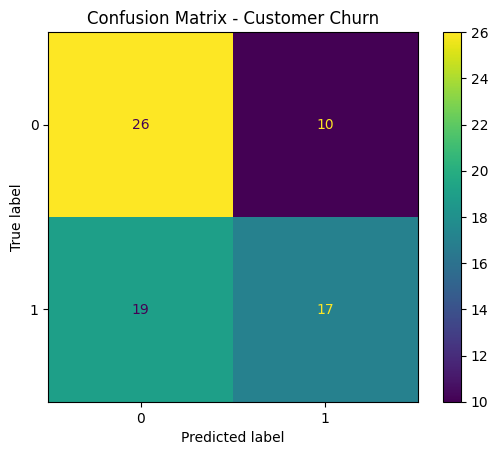

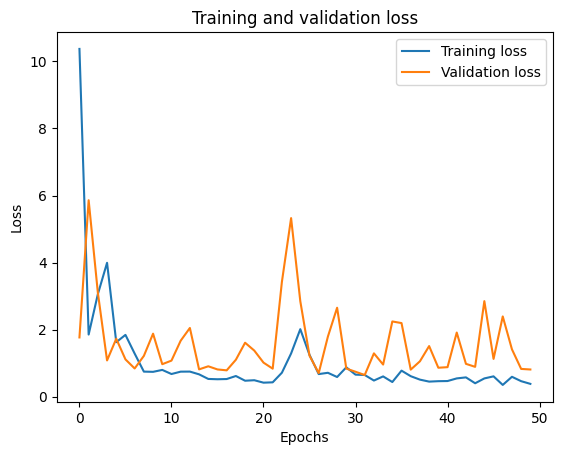

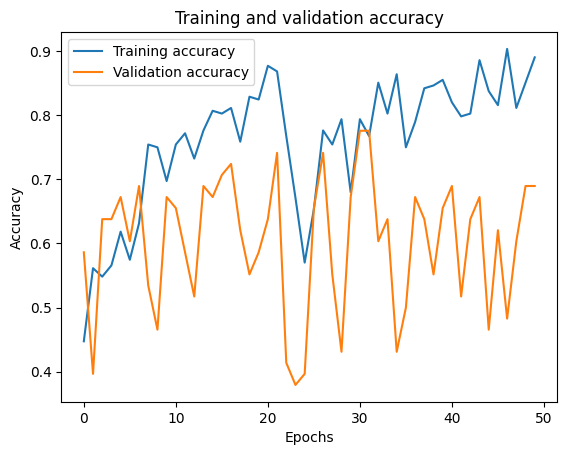

In [423]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Customer Churn")
plt.show()

# ploting loss on trainging vs loss on validation
plt.figure()
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# ploting accuracy on training vs acccuracy on validation
plt.figure()
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()